In [1]:
from core import *
import requests, json

In [2]:
dataset_id = {
    'all': 'd_9b03f859cf33910632f42a01f0583576', 
    'at_marriage': 'd_e42526ed15108b310f9efe5077bca27a', 
}
dataset_mode = 'all'

In [3]:
response = requests.get(
    'https://data.gov.sg/api/action/datastore_search', 
    params={
        'resource_id': dataset_id[dataset_mode],
        'limit': 999
    }
)
print(json.dumps(response.json(), indent=2))

{
  "help": "https://data.gov.sg/api/3/action/help_show?name=datastore_search",
  "success": true,
  "result": {
    "resource_id": "d_9b03f859cf33910632f42a01f0583576",
    "fields": [
      {
        "type": "text",
        "id": "DataSeries"
      },
      {
        "type": "numeric",
        "id": "2023"
      },
      {
        "type": "numeric",
        "id": "2022"
      },
      {
        "type": "numeric",
        "id": "2021"
      },
      {
        "type": "numeric",
        "id": "2020"
      },
      {
        "type": "numeric",
        "id": "2019"
      },
      {
        "type": "numeric",
        "id": "2018"
      },
      {
        "type": "numeric",
        "id": "2017"
      },
      {
        "type": "numeric",
        "id": "2016"
      },
      {
        "type": "numeric",
        "id": "2015"
      },
      {
        "type": "numeric",
        "id": "2014"
      },
      {
        "type": "numeric",
        "id": "2013"
      },
      {
        "type": "numeri

In [4]:
data = response.json()
records = data['result']['records']
df = pd.DataFrame(records)
df['DataSeries'] = df['DataSeries'].str.replace(r'(?i)\baged?\b\s*|\s*\bye?a?rs?\b|\s*\bat\W*marriage\b|\bwith\b\s*|\bdivorces?\b', '', regex=True).str.strip()
df['SubDataSeries'] = df['DataSeries'].where(df['DataSeries'].str.startswith('Male'))
df['DataSeries'] = df['DataSeries'].where(df['SubDataSeries'].isna()).ffill()
df['SubDataSeries'] = df['SubDataSeries'].fillna('Total')
df['DataSeries'] = df['DataSeries'].str.replace(r'(?i)\bf?e?male\W*|\bdivorcees?\W*', '', regex=True).str.replace(r'[^a-zA-Z0-9&]+', ' ').str.title().str.strip()
df['SubDataSeries'] = df['SubDataSeries'].str.replace(r'(?i)\bf?e?male\W*|\bdivorcees?\W*', '', regex=True).str.replace(r'[^a-zA-Z0-9&]+', ' ').str.title().str.strip()
df = df.rename(columns={'DataSeries': 'brides', 'SubDataSeries': 'grooms'}).drop(columns=['_id'])
df['grooms'] = df['grooms'].replace({'40-44': '40+', '45-49': '40+', '50-54': '40+', '55-59': '40+', '60 & Over': '40+', })
df['brides'] = df['brides'].replace({'40-44': '40+', '45-49': '40+', '50-54': '40+', '55-59': '40+', '60 & Over': '40+', })
df['brides'] = pd.Categorical(df['brides'], ['Unknown', 'Under 20', '20-24', 'Under 25', '25-29', '30-34', '35-39', '40+', 'Total'], ordered=True)
df['grooms'] = pd.Categorical(df['grooms'], ['Unknown', 'Under 20', '20-24', 'Under 25', '25-29', '30-34', '35-39', '40+', 'Total'], ordered=True)
df['comparison'] = df['grooms'].lt(df['brides']).map({True: 'Groom < Bride', False: 'Groom = Bride'}).where(df['grooms'].le(df['brides']), 'Groom > Bride')
df['comparison'] = pd.Categorical(df['comparison'], ['Groom < Bride', 'Groom = Bride', 'Groom > Bride'], ordered=True)
for col in df.drop(columns=['brides', 'grooms', 'comparison']).columns:
    try:
        df[col] = df[col].astype('int')
    except:
        df[col] = df[col].str.strip().astype('int')
df = df.groupby(by=['brides', 'grooms', 'comparison'], observed=True).sum()
df = df.rename(columns=int).astype('int').transpose().sort_index(axis=0).sort_index(axis=1).copy(deep=True)
# df = df.set_index(keys=['brides', 'grooms', 'comparison']).rename(columns=int).astype('int').transpose().sort_index(axis=0).sort_index(axis=1).copy(deep=True)
# df = df.set_index(keys=['brides', 'grooms']).rename(columns=int).astype('int').unstack(level=0).sort_index(axis=0).sort_index(axis=1).copy(deep=True)
assert isinstance(df, pd.DataFrame)
display_all_columns(df)

brides           Unknown                                            \
grooms           Unknown      Under 25         25-29         30-34   
comparison Groom = Bride Groom > Bride Groom > Bride Groom > Bride   
1980                   0             0             0             0   
1981                   0             1             1             1   
1982                   0             0             0             1   
1983                   0             0             0             1   
1984                   0             0             0             0   
1985                   0             0             0             0   
1986                   0             0             0             0   
1987                   0             0             0             0   
1988                   0             0             0             0   
1989                   0             0             0             0   
1990                   0             0             0             0   
1991                   0             0             0             0   
1992                   0             0             0             0   
1993                   0             0             0             0   
1994                   0             0             0             0   
1995                   0             0             0             0   
1996                   0             0             0             0   
1997                   0             0             0             0   
1998                   0             0             0             0   
1999                   0             0             0             0   
2000                   0             0             0             0   
2001                   0             0             0             0   
2002                   0             0             0             0   
2003                   0             0             0             0   
2004                   0             0             0             0   
2005                   0             0             0             0   
2006                   0             0             0             0   
2007                   0             0             0             0   
2008                   0             0             0             0   
2009                   0             0             0             0   
2010                   0             0             0             0   
2011                   0             0             0             0   
2012                   0             0             0             0   
2013                   0             0             0             0   
2014                   0             0             0             0   
2015                   0             0             0             0   
2016                   0             0             0             0   
2017                   0             0             0             0   
2018                   0             0             0             0   
2019                   0             0             0             0   
2020                   0             0             0             0   
2021                   0             0             0             0   
2022                   0             0             0             0   
2023                   0             0             0             0   

brides                                                    Under 25  \
grooms             35-39           40+         Total       Unknown   
comparison Groom > Bride Groom > Bride Groom > Bride Groom < Bride   
1980                   1             1             2             3   
1981                   3             0             6             0   
1982                   1             2             4             0   
1983                   0             2             3             2   
1984                   0             0             0             0   
1985                   0             0             0             0   
1986                   0             0             0             0   
1987     

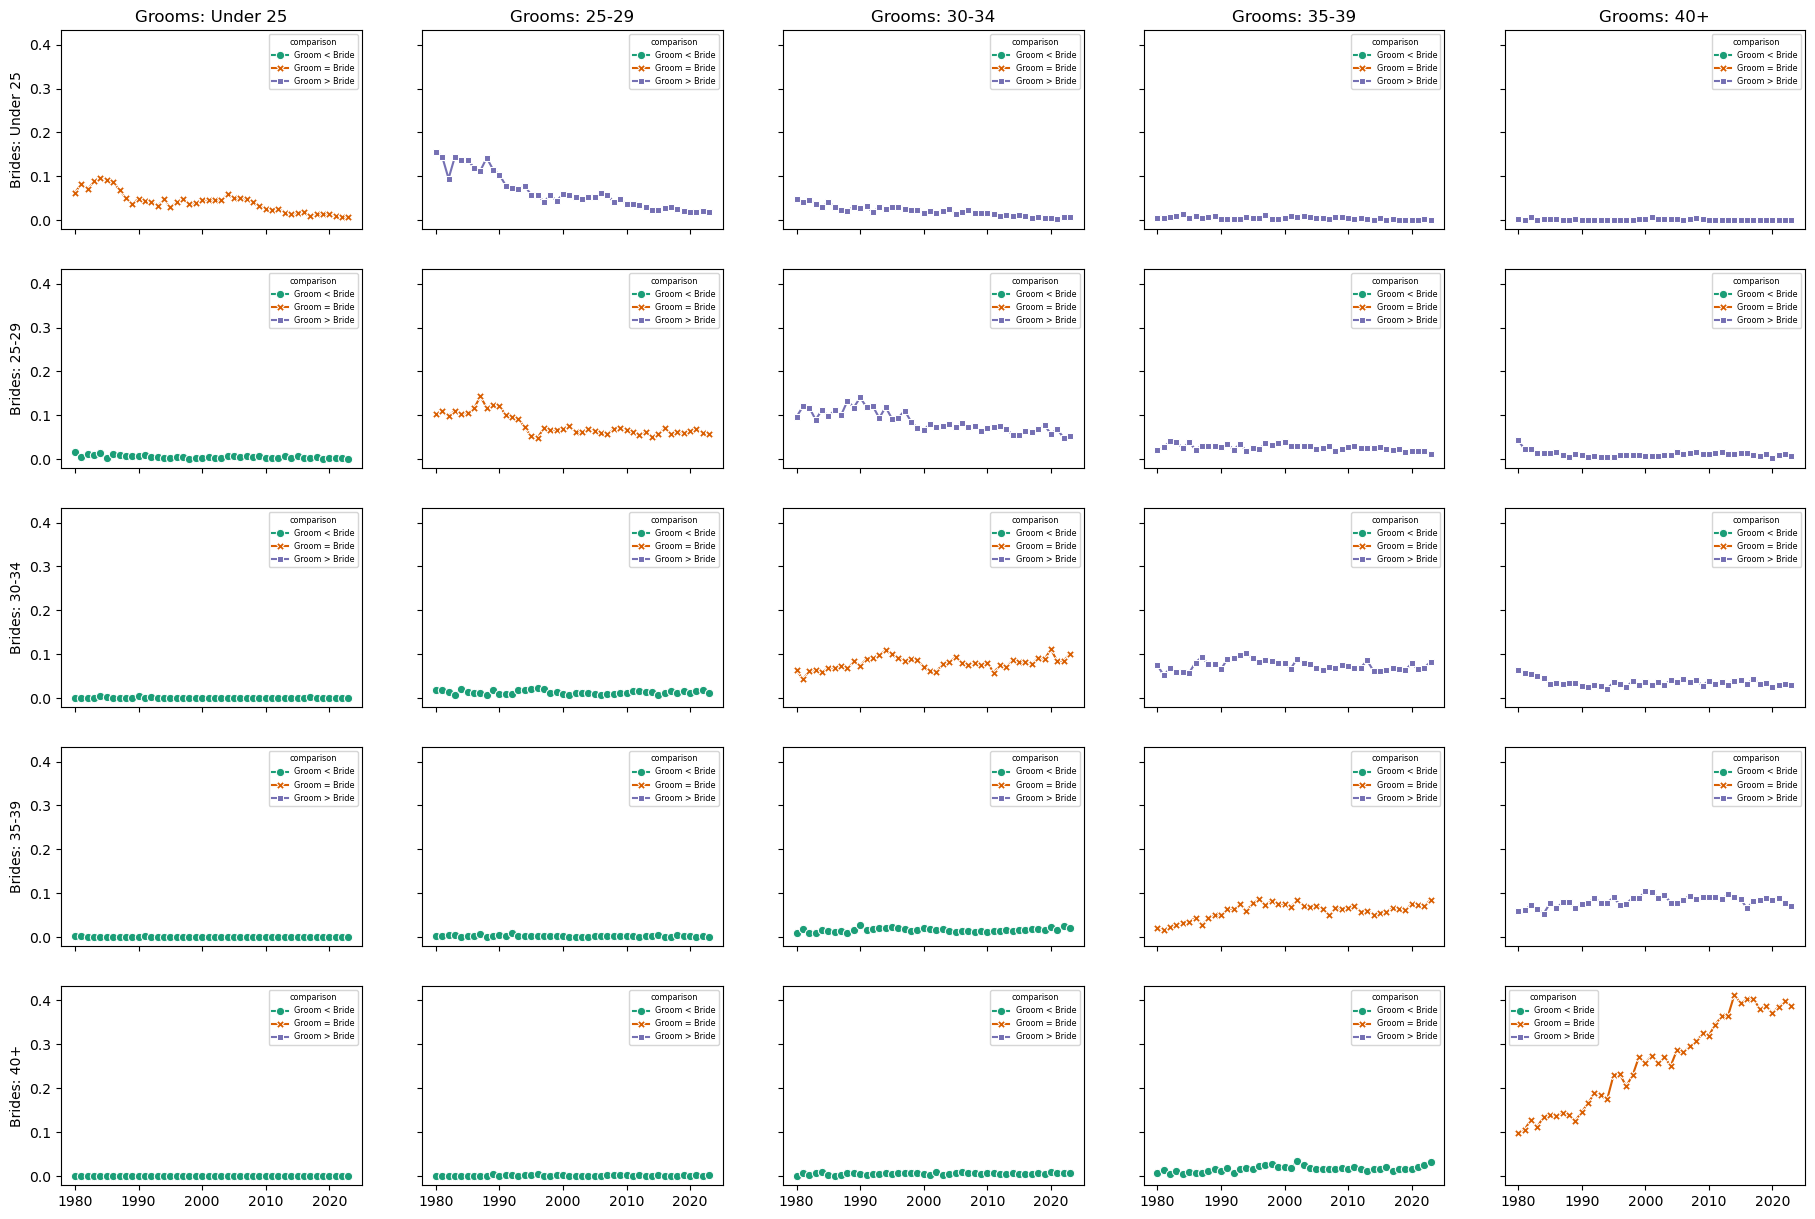

In [5]:
df_pct = df.apply(lambda row: row / row[('Total', 'Total', 'Groom = Bride')], axis=1)
_df_pct = df_pct.droplevel(level=['comparison'], axis=1).copy(deep=True)
fig, axs = plot_multicol_data(df_pct.drop(columns=['Unknown', 'Total'], level='brides').drop(columns=['Unknown', 'Total'], level='grooms'), x_level='brides', y_level='grooms')
plt.show()
fig.clf()
plt.close()

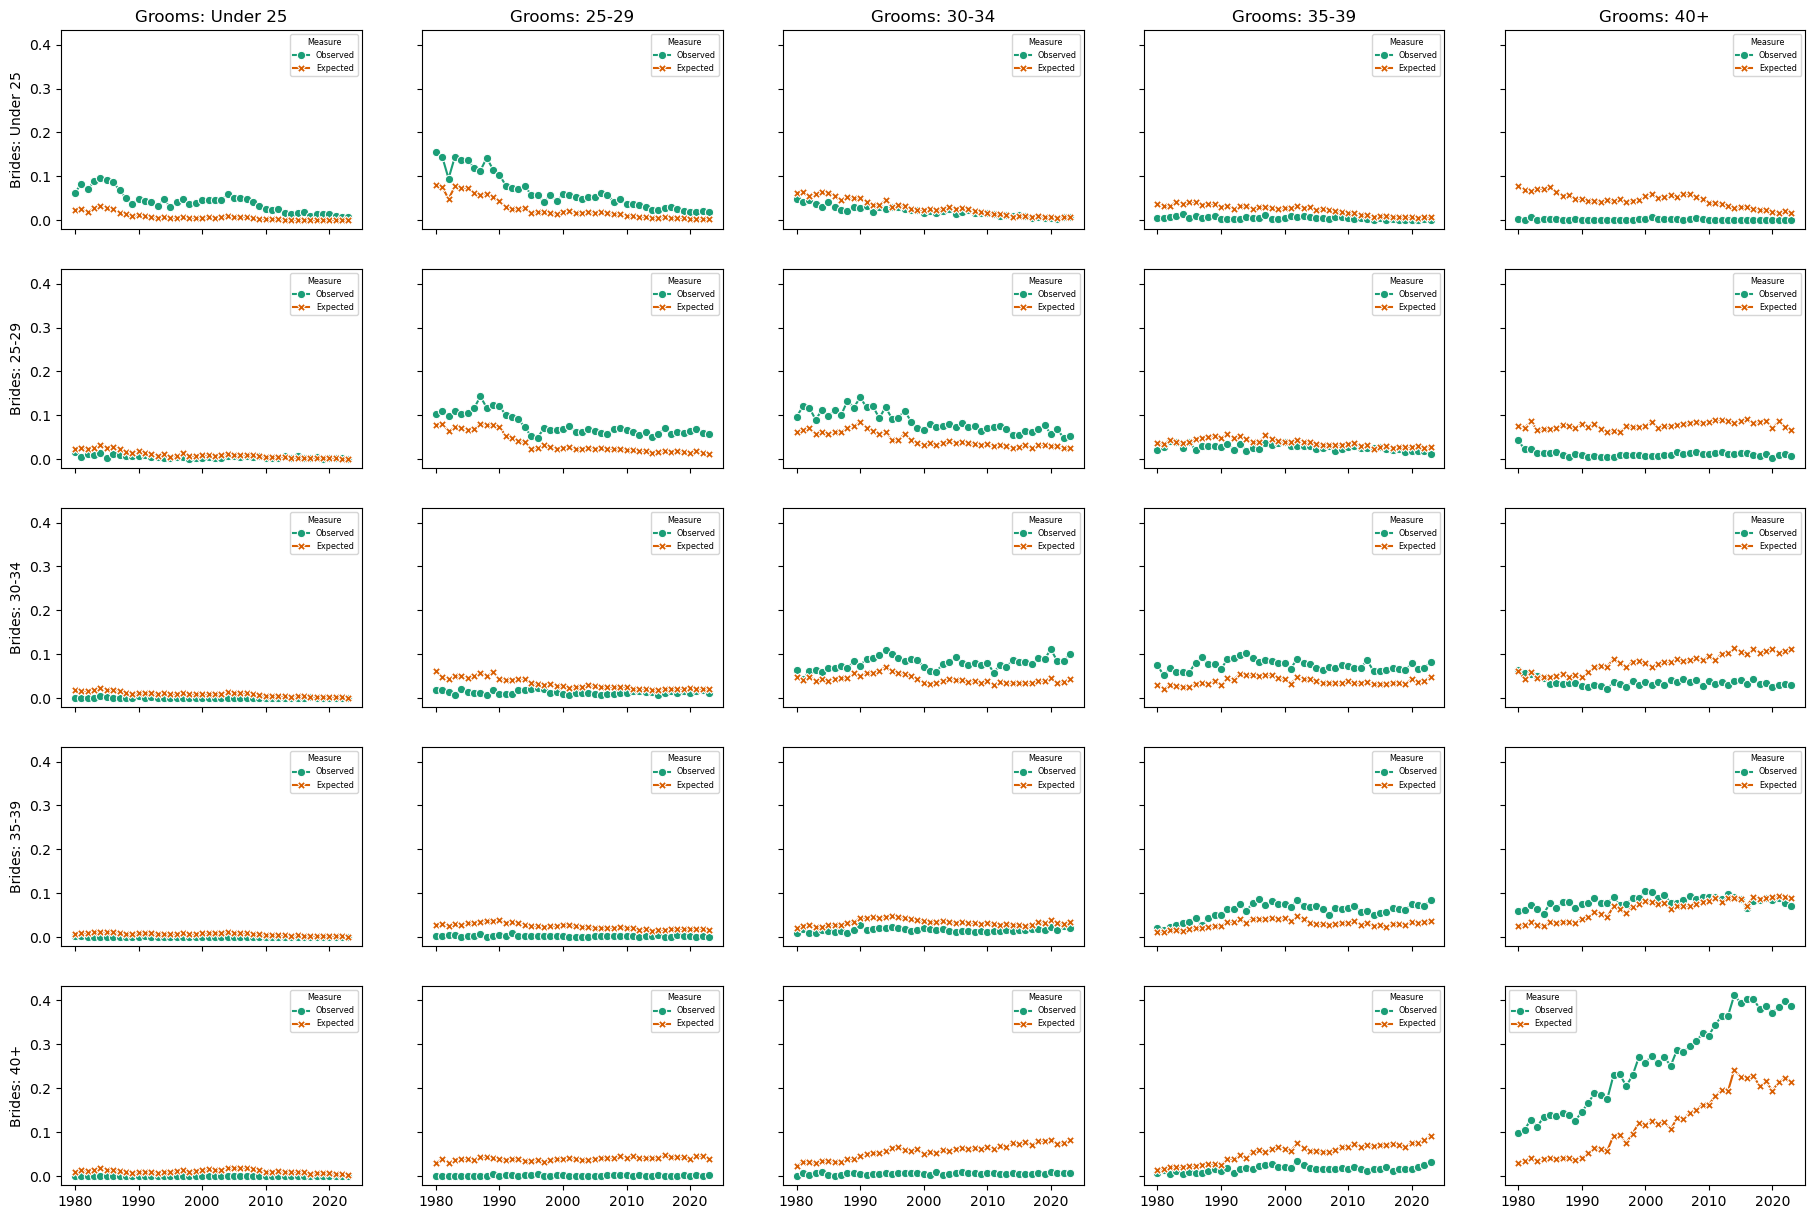

In [6]:
df_pct_margin = pd.concat({
    b_lvl: _df_pct.xs(('Total',), 1, ('brides',)).apply(lambda row: row * _df_pct.loc[row.name,(b_lvl,'Total')], axis=1)
    for b_lvl in _df_pct.columns.unique('brides')
}, axis=1, names=['brides', 'grooms'])
df_pct_margin = pd.concat({
    'Observed': _df_pct, 'Expected': df_pct_margin, 
}, axis=1, names=['Measure', 'brides', 'grooms'])
_df_pct_margin = df_pct_margin.drop(columns=['Unknown', 'Total'], level='brides').drop(columns=['Unknown', 'Total'], level='grooms').copy(deep=True)
fig, axs = plot_multicol_data(_df_pct_margin, x_level='brides', y_level='grooms')
fig.savefig(f'./agegroup_{dataset_mode}.svg', transparent=False, format='svg', bbox_inches='tight')
plt.show()
fig.clf()
plt.close()

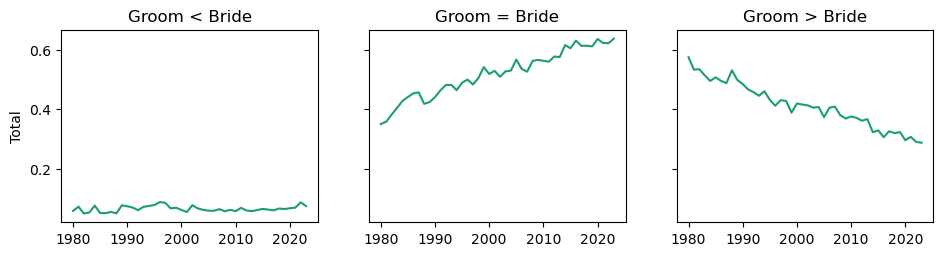

In [7]:
df_comp_pct = df_pct.drop(columns=['Unknown', 'Total'], level='brides').drop(columns=['Unknown', 'Total'], level='grooms').T.groupby(by=['comparison'], observed=True).sum().T.copy(deep=True)
fig, axs = plot_singlecol_data(df_comp_pct, 'Total')
plt.show()
fig.clf()
plt.close()

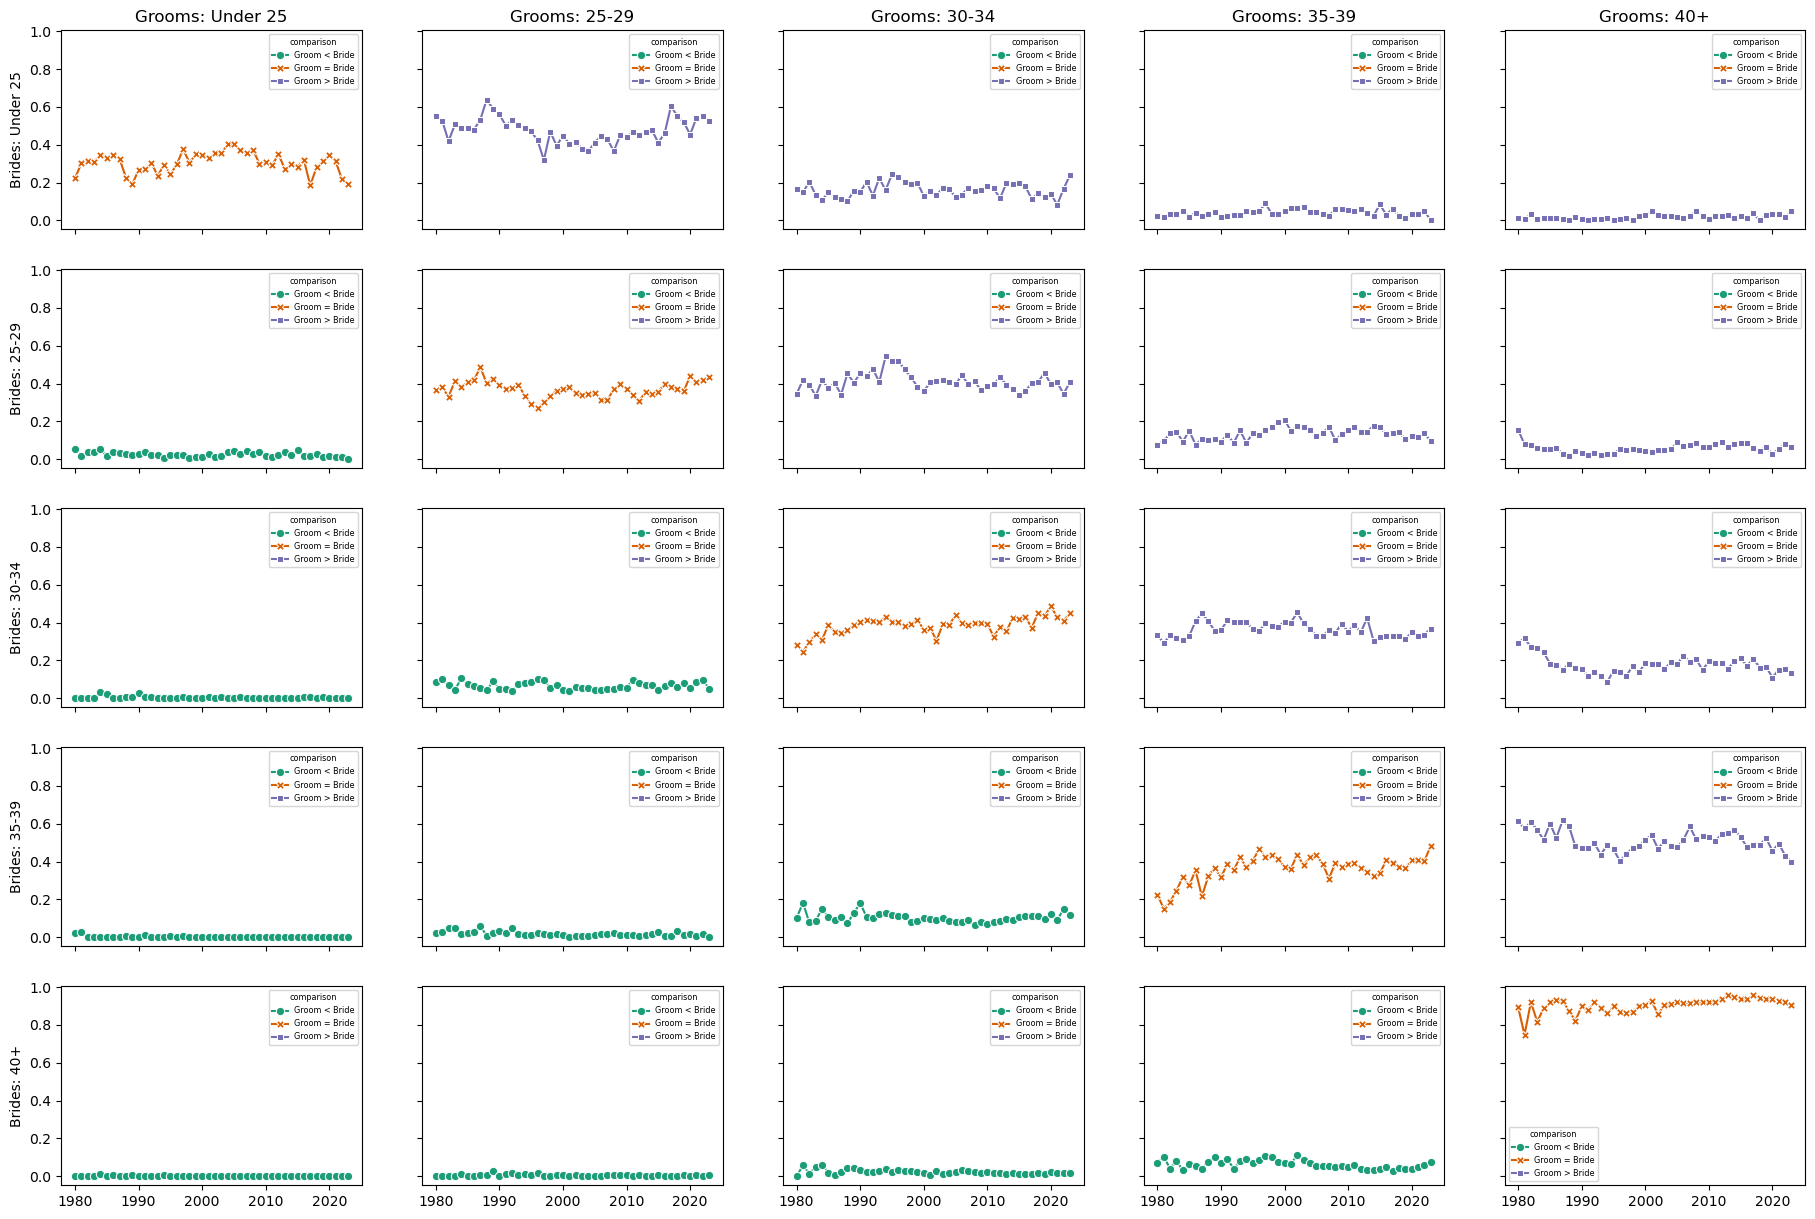

In [8]:
df_bride_pct = df_pct.div(df_pct.xs(('Total',), 1, ('grooms',)).droplevel(level=['comparison'], axis=1))#.droplevel(level=['comparison'], axis=1)
_df_bride_pct = df_bride_pct.drop(columns=['Unknown', 'Total'], level='brides').drop(columns=['Unknown', 'Total'], level='grooms').copy(deep=True)
fig, axs = plot_multicol_data(_df_bride_pct, x_level='brides', y_level='grooms')
plt.show()
fig.clf()
plt.close()

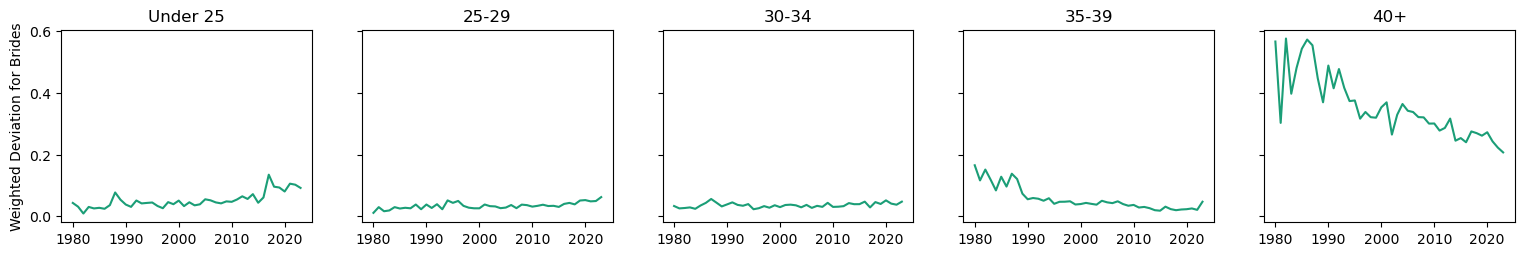

In [9]:
df_bride_pct_dev = _df_bride_pct.subtract(df_pct.droplevel(level=['comparison'], axis=1).xs(('Total',), 1, ('grooms',)).rename_axis(columns=['grooms'])).pow(2)
df_bride_pct_dev = df_bride_pct_dev.mul(_df_bride_pct)
df_bride_pct_dev = df_bride_pct_dev.T.groupby(by=['brides'], observed=True).sum().div(_df_bride_pct.T.groupby(by=['brides'], observed=True).sum()).T
fig, axs = plot_singlecol_data(df_bride_pct_dev, 'Weighted Deviation for Brides')
plt.show()
fig.clf()
plt.close()

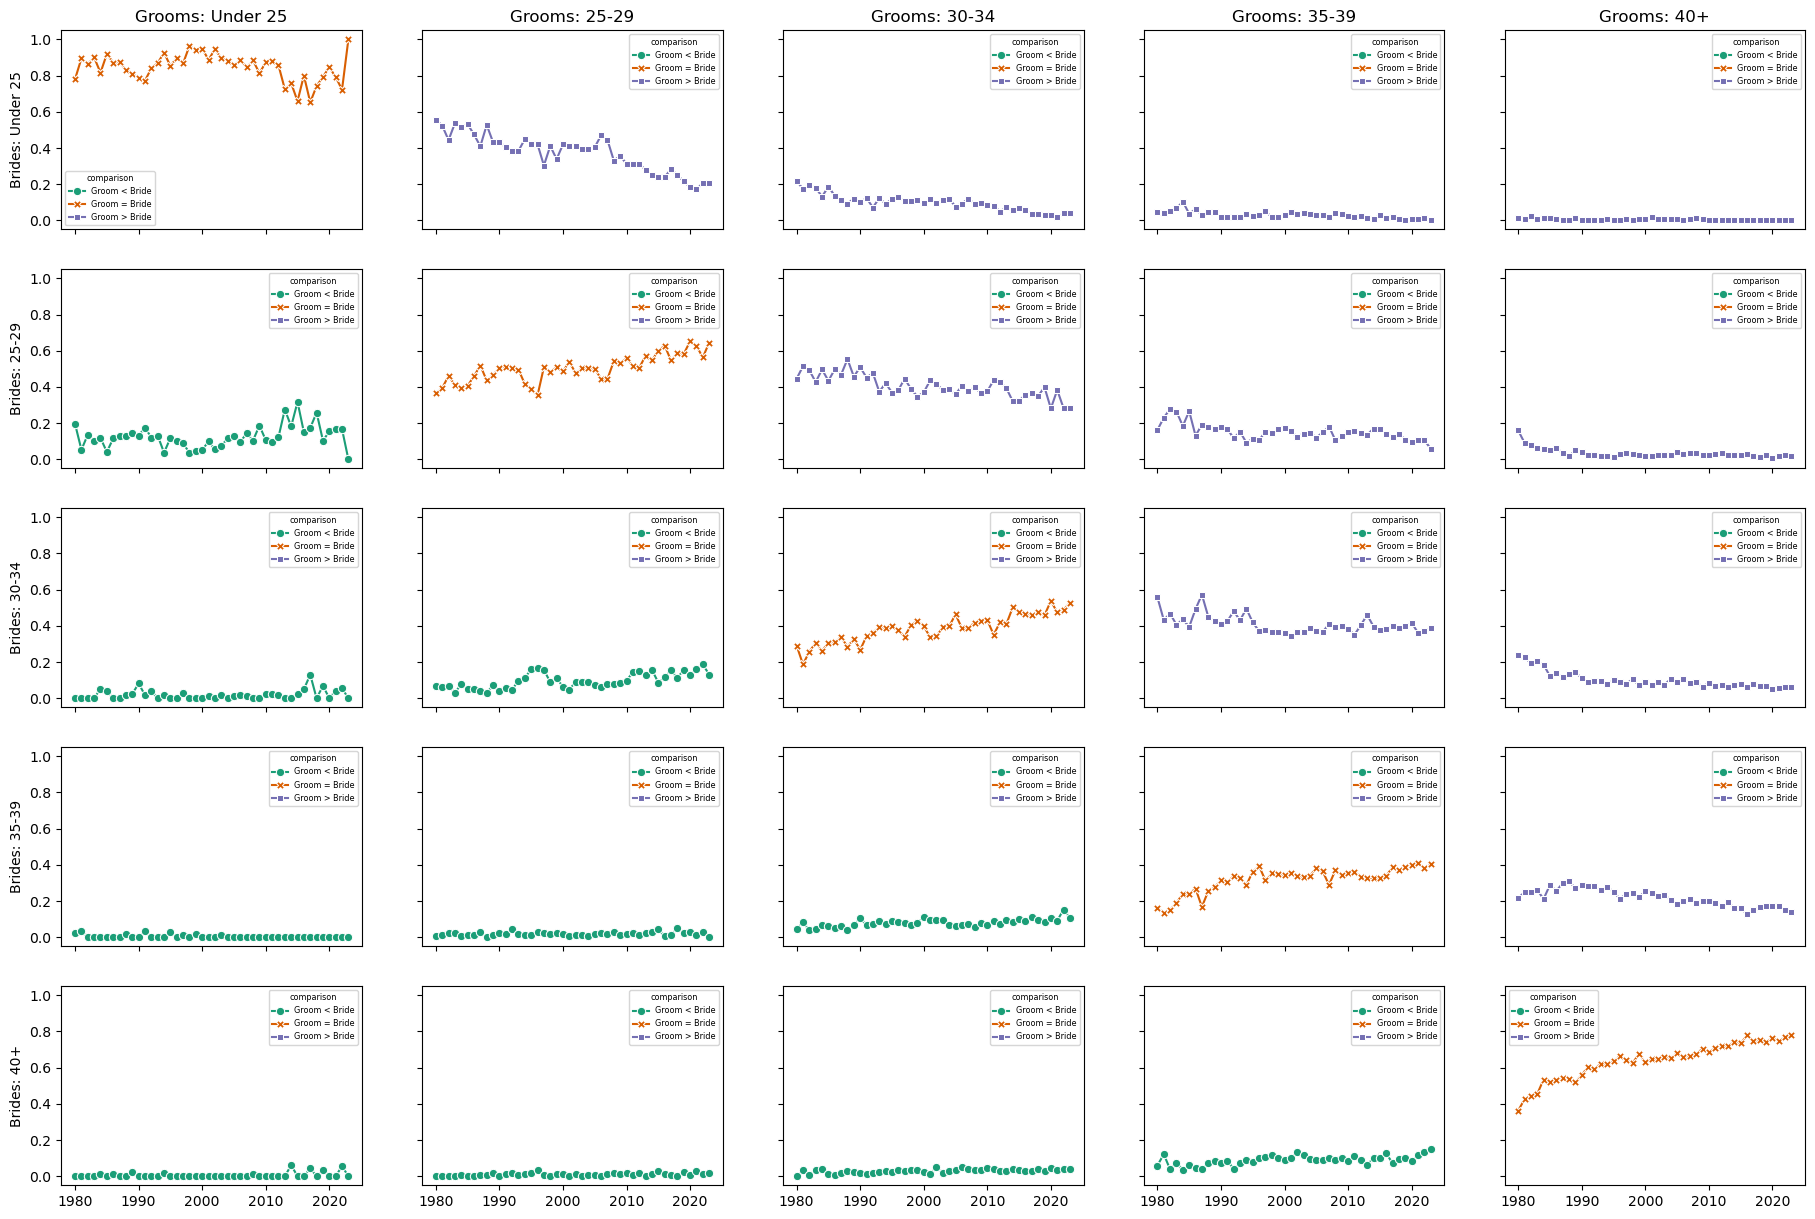

In [10]:
df_groom_pct = df_pct.div(df_pct.xs(('Total',), 1, ('brides',)).droplevel(level=['comparison'], axis=1))#.droplevel(level=['comparison'], axis=1)
_df_groom_pct = df_groom_pct.drop(columns=['Unknown', 'Total'], level='brides').drop(columns=['Unknown', 'Total'], level='grooms').copy(deep=True)
fig, axs = plot_multicol_data(_df_groom_pct, x_level='brides', y_level='grooms')
plt.show()
fig.clf()
plt.close()

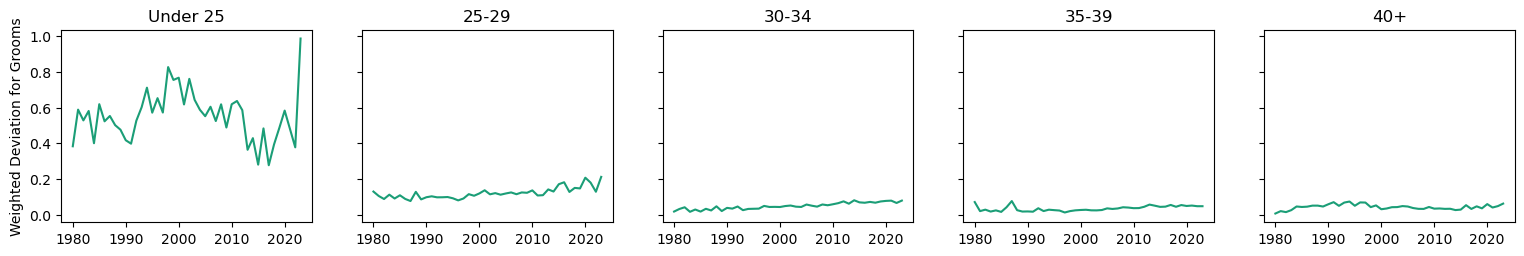

In [11]:
df_groom_pct_dev = _df_groom_pct.subtract(df_pct.droplevel(level=['comparison'], axis=1).xs(('Total',), 1, ('brides',)).rename_axis(columns=['brides'])).pow(2)
df_groom_pct_dev = df_groom_pct_dev.mul(_df_groom_pct)
df_groom_pct_dev = df_groom_pct_dev.T.groupby(by=['grooms'], observed=True).sum().div(_df_groom_pct.T.groupby(by=['grooms'], observed=True).sum()).T
fig, axs = plot_singlecol_data(df_groom_pct_dev, 'Weighted Deviation for Grooms')
plt.show()
fig.clf()
plt.close()